Create dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the dataset with 100 rows and 4 input variables (x1, x2, x3, x4) and 1 output variable (y)
np.random.seed(0)
data = {
    'x1': np.random.randint(1, 100, 100),
    'x2': np.random.randint(50, 150, 100) * -1,
    'x3': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'x4': np.random.randint(1, 6, 100),
    'y': np.random.randint(100, 1000, 100)
}

# Introducing missing values
for col in ['x1', 'x2', 'x3', 'x4', 'y']:
    data[col] = np.where(np.random.rand(100) < 0.1, np.nan, data[col])

# Creating a DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('students_performance.csv', index=False)


Part a

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values using mean imputation for x1 and x2, mode imputation for x3, and median imputation for x4
df['x1'].fillna(df['x1'].mean(), inplace=True)
df['x2'].fillna(df['x2'].mean(), inplace=True)
df['x3'].fillna(df['x3'].mode()[0], inplace=True)
df['x4'].fillna(df['x4'].median(), inplace=True)


x1    16
x2     8
x3     0
x4    17
y     12
dtype: int64


Part b

In [ ]:
# Encode x3 using one-hot encoding and x4 using label encoding
df = pd.get_dummies(df, columns=['x3'], drop_first=True)
df['x4'] = df['x4'].astype('category').cat.codes


Part c

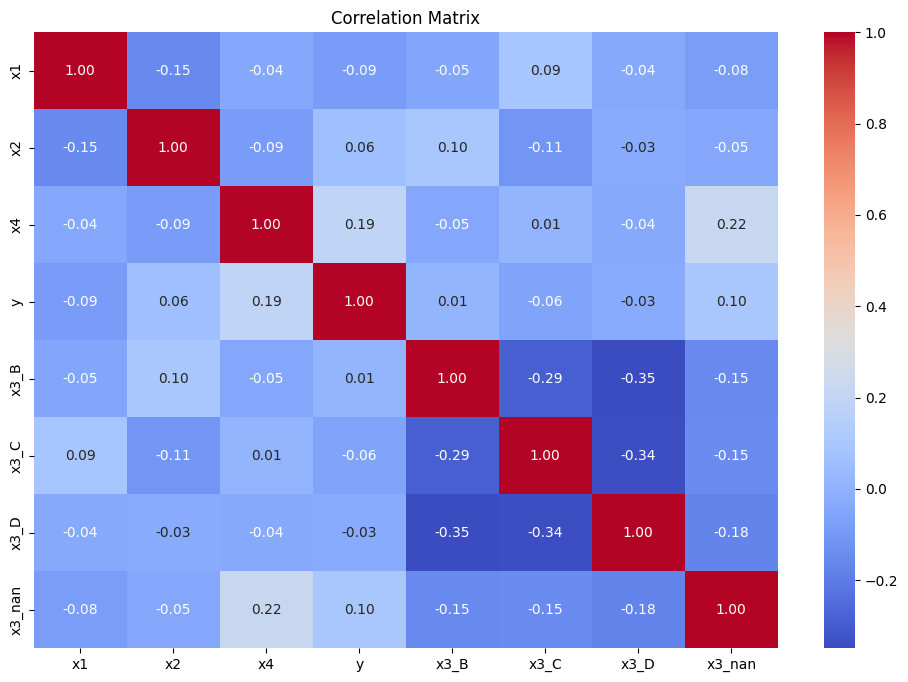

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Correlation values closer to 1 or -1 indicate stronger relationships
# Positive values indicate a positive correlation, negative values indicate a negative correlation
# Variables with higher absolute correlation values with 'y' are directly related to the output variable


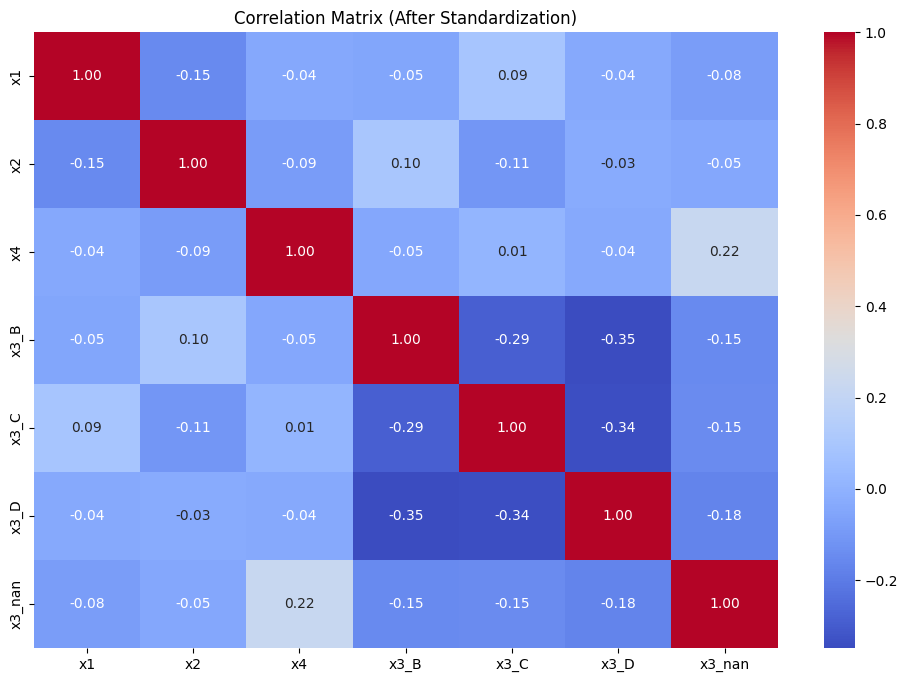

In [ ]:
# Separate features (x1, x2, x3, x4) and target variable (y)
features = df.drop(columns=['y'])
target = df['y']

# Apply Standardization on features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Recompute correlation matrix for scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_correlation_matrix = scaled_df.corr()

# Plot the correlation matrix of scaled features
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (After Standardization)')
plt.show()


# New Section